In [5]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt

from mne import read_epochs, set_log_level
from mne.decoding import CSP
from sklearn import svm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

In [6]:
set_log_level('warning')
epochs = read_epochs('ica_epo.fif')

In [7]:
def dwt_coeff(x, lvl=1, db='db2'):
    coeff = pywt.wavedec(x, db, mode='sym')
    return coeff[lvl]

def avg_pwr(x):
    return np.average(x)

def standarize(array, mean, std):
    return (array-mean)/std

def energy(x):
    return np.sum(x**2)

def std(x):
    return np.std(x)

def max_coeff(x):
    return np.max(x)

def max_coeff(x):
    return np.min(x)


In [8]:
pca = PCA(n_components=0.9)
le = LabelEncoder()
scaler = StandardScaler()
linear_svm = svm.SVC()
lda = LinearDiscriminantAnalysis(solver='lsqr',shrinkage='auto')

Load epochs

In [9]:
conditions = ['left','rest']
subset = epochs[conditions].copy()
subset.drop_channels(subset.info['bads'])
subset = subset.pick(['eeg'])
subset = subset.apply_baseline((-1.4,-0.4))
y = le.fit_transform(subset.events[:,2])
time_config = (3,0.4,400,200)

Vizualize data

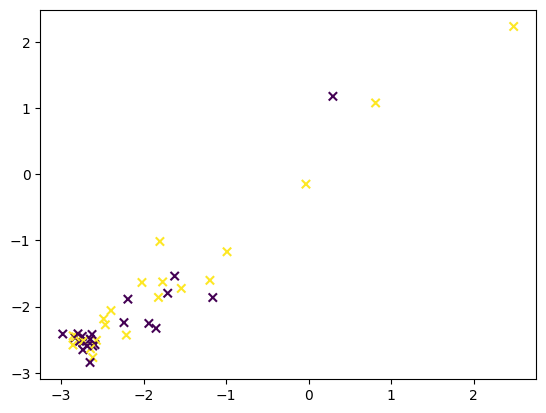

In [10]:
csp = CSP(n_components=12, reg=None, log=True, norm_trace=False, rank='info')
train_data = subset.copy().crop(.4,1.9).filter(60,90).get_data()    
data = csp.fit_transform(train_data, y)
plt.figure()
plt.scatter(data[:,0], data[:,1], c=y, marker='x')

In [11]:
csp_test_classifiers(8,time_config, 35, 18)

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

Epoch 1/15
2/2 [==============================] - 1s 13ms/step - loss: 0.1713 - accuracy: 0.7576
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1703 - accuracy: 0.7576
Epoch 3/15
2/2 [==============================] - 0s 7ms/step - loss: 0.1695 - accuracy: 0.7879
Epoch 4/15
2/2 [==============================] - 0s 6ms/step - loss: 0.1687 - accuracy: 0.8182
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1681 - accuracy: 0.8182
Epoch 6/15
2/2 [==============================] - 0s 6ms/step - loss: 0.1674 - accuracy: 0.8182
Epoch 7/15
2/2 [==============================] - 0s 6ms/step - loss: 0.1668 - accuracy: 0.8182
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1662 - accuracy: 0.8182
Epoch 9/15
2/2 [==============================] - 0s 6ms/step - loss: 0.1657 - accuracy: 0.8182
Epoch 10/15
2/2 [==============================] - 0s 7ms/step - loss: 0.1651 - accuracy: 0.8182
Epoch 11/15
2/2 [=====================

1/1 [==============================] - 0s 145ms/step - loss: 0.2852 - accuracy: 0.5556
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3706 - accuracy: 0.4848
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3691 - accuracy: 0.4848
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3681 - accuracy: 0.5152
Epoch 4/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3672 - accuracy: 0.5455
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3665 - accuracy: 0.5455
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3659 - accuracy: 0.5758
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3653 - accuracy: 0.5758
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3647 - accuracy: 0.5758
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3642 - accuracy: 0.5758
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 6ms/step - loss: 0.2239 - accuracy: 0.6364
Epoch 15/15
1/1 [==============================] - 0s 136ms/step - loss: 0.2823 - accuracy: 0.5556
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.4559 - accuracy: 0.2424
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.4542 - accuracy: 0.2424
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.4527 - accuracy: 0.2424
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.4515 - accuracy: 0.2424
Epoch 5/15
2/2 [==============================] - 0s 6ms/step - loss: 0.4505 - accuracy: 0.2424
Epoch 6/15
2/2 [==============================] - 0s 6ms/step - loss: 0.4495 - accuracy: 0.2424
Epoch 7/15
2/2 [==============================] - 0s 6ms/step - loss: 0.4486 - accuracy: 0.2424
Epoch 8/15
2/2 [==============================] - 0s 6ms/step - loss: 0.4476 - accuracy: 0.2424
Epoch 9/15
2/2 [==============================] 

2/2 [==============================] - 0s 5ms/step - loss: 0.2059 - accuracy: 0.7273
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2049 - accuracy: 0.7273
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2040 - accuracy: 0.7273
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2031 - accuracy: 0.7273
Epoch 7/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2023 - accuracy: 0.7273
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2016 - accuracy: 0.7273
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2009 - accuracy: 0.7273
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2002 - accuracy: 0.7273
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1994 - accuracy: 0.7273
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1987 - accuracy: 0.7273
Epoch 13/15
2/2 [==============================]

2/2 [==============================] - 0s 5ms/step - loss: 0.2791 - accuracy: 0.5455
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2783 - accuracy: 0.5455
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2775 - accuracy: 0.5455
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2767 - accuracy: 0.5455
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2760 - accuracy: 0.5455
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2752 - accuracy: 0.5455
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2745 - accuracy: 0.5455
Epoch 15/15
1/1 [==============================] - 0s 118ms/step - loss: 0.3344 - accuracy: 0.5556
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2992 - accuracy: 0.3030
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2979 - accuracy: 0.2727
Epoch 3/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.1779 - accuracy: 0.7879
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1770 - accuracy: 0.7879
Epoch 15/15
1/1 [==============================] - 0s 143ms/step - loss: 0.1768 - accuracy: 0.8889
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.3027 - accuracy: 0.3333
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3010 - accuracy: 0.3333
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2997 - accuracy: 0.3333
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2987 - accuracy: 0.3333
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2977 - accuracy: 0.3333
Epoch 6/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2969 - accuracy: 0.3333
Epoch 7/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2960 - accuracy: 0.3333
Epoch 8/15
2/2 [==============================]

2/2 [==============================] - 0s 5ms/step - loss: 0.3388 - accuracy: 0.3030
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3375 - accuracy: 0.3030
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3365 - accuracy: 0.3030
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3357 - accuracy: 0.3030
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3348 - accuracy: 0.3333
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3341 - accuracy: 0.3333
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3333 - accuracy: 0.3333
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3325 - accuracy: 0.3333
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3318 - accuracy: 0.3333
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3311 - accuracy: 0.3333
Epoch 12/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.2643 - accuracy: 0.6061
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2637 - accuracy: 0.6061
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2630 - accuracy: 0.6061
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2624 - accuracy: 0.6061
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2617 - accuracy: 0.6061
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2611 - accuracy: 0.6061
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2605 - accuracy: 0.6061
Epoch 14/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2600 - accuracy: 0.6061
Epoch 15/15
1/1 [==============================] - 0s 118ms/step - loss: 0.2508 - accuracy: 0.5556
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3072 - accuracy: 0.5758
Epoch 2/15
2/2 [===========================

2/2 [==============================] - 0s 5ms/step - loss: 0.3054 - accuracy: 0.3636
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3047 - accuracy: 0.3636
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3041 - accuracy: 0.3636
Epoch 15/15
1/1 [==============================] - 0s 114ms/step - loss: 0.2916 - accuracy: 0.5556
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2680 - accuracy: 0.5758
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2670 - accuracy: 0.5455
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2662 - accuracy: 0.6061
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2655 - accuracy: 0.6364
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2648 - accuracy: 0.6364
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2642 - accuracy: 0.6364
Epoch 7/15
2/2 [==============================

2/2 [==============================] - 1s 4ms/step - loss: 0.3096 - accuracy: 0.4848
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3085 - accuracy: 0.5152
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3076 - accuracy: 0.4848
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3068 - accuracy: 0.4848
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3059 - accuracy: 0.5152
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3052 - accuracy: 0.5152
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3045 - accuracy: 0.5152
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3040 - accuracy: 0.5152
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3034 - accuracy: 0.5152
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3029 - accuracy: 0.4848
Epoch 11/15
2/2 [==============================] -

2/2 [==============================] - 0s 5ms/step - loss: 0.1883 - accuracy: 0.6364
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1877 - accuracy: 0.6364
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1872 - accuracy: 0.6364
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1866 - accuracy: 0.6364
Epoch 10/15
2/2 [==============================] - 0s 8ms/step - loss: 0.1860 - accuracy: 0.6667
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1854 - accuracy: 0.6667
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1848 - accuracy: 0.6667
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1842 - accuracy: 0.6970
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1836 - accuracy: 0.6970
Epoch 15/15
1/1 [==============================] - 0s 120ms/step - loss: 0.2988 - accuracy: 0.3333
Epoch 1/15
2/2 [===========================

2/2 [==============================] - 0s 5ms/step - loss: 0.2499 - accuracy: 0.5455
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2496 - accuracy: 0.5455
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2491 - accuracy: 0.5455
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2487 - accuracy: 0.5455
Epoch 15/15
1/1 [==============================] - 0s 133ms/step - loss: 0.2214 - accuracy: 1.0000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3622 - accuracy: 0.2121
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3603 - accuracy: 0.2727
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3586 - accuracy: 0.2727
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3570 - accuracy: 0.2727
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3556 - accuracy: 0.2727
Epoch 6/15
2/2 [=============================

1/1 [==============================] - 0s 120ms/step - loss: 0.3370 - accuracy: 0.5556
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2967 - accuracy: 0.4848
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2956 - accuracy: 0.4848
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2948 - accuracy: 0.4848
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2941 - accuracy: 0.4848
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2933 - accuracy: 0.4848
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2927 - accuracy: 0.4848
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2920 - accuracy: 0.4848
Epoch 8/15
2/2 [==============================] - 0s 3ms/step - loss: 0.2913 - accuracy: 0.4848
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2906 - accuracy: 0.4848
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.2551 - accuracy: 0.6061
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2539 - accuracy: 0.6061
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2528 - accuracy: 0.6364
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2518 - accuracy: 0.6364
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2508 - accuracy: 0.6364
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2497 - accuracy: 0.6364
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2487 - accuracy: 0.6364
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2478 - accuracy: 0.6364
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2468 - accuracy: 0.6667
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2458 - accuracy: 0.6667
Epoch 15/15
1/1 [=============================

2/2 [==============================] - 0s 4ms/step - loss: 0.3467 - accuracy: 0.3636
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3460 - accuracy: 0.3636
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3453 - accuracy: 0.3636
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3445 - accuracy: 0.3636
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3438 - accuracy: 0.3636
Epoch 15/15
1/1 [==============================] - 0s 113ms/step - loss: 0.2551 - accuracy: 0.5556
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3079 - accuracy: 0.4848
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3064 - accuracy: 0.4848
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3054 - accuracy: 0.3939
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3045 - accuracy: 0.3939
Epoch 5/15
2/2 [============================

1/1 [==============================] - 0s 118ms/step - loss: 0.2137 - accuracy: 0.6667
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2734 - accuracy: 0.6061
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2719 - accuracy: 0.6364
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2707 - accuracy: 0.6364
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2697 - accuracy: 0.6364
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2688 - accuracy: 0.6364
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2681 - accuracy: 0.6364
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2673 - accuracy: 0.6364
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2665 - accuracy: 0.6364
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2657 - accuracy: 0.6364
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.3666 - accuracy: 0.3636
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3655 - accuracy: 0.3636
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3646 - accuracy: 0.3636
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3637 - accuracy: 0.3636
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3628 - accuracy: 0.3636
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3619 - accuracy: 0.3636
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3611 - accuracy: 0.3636
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3602 - accuracy: 0.3636
Epoch 12/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3593 - accuracy: 0.3636
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3584 - accuracy: 0.3636
Epoch 14/15
2/2 [==============================

2/2 [==============================] - 0s 5ms/step - loss: 0.2504 - accuracy: 0.6061
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2499 - accuracy: 0.6061
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2495 - accuracy: 0.6061
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2490 - accuracy: 0.6061
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2485 - accuracy: 0.6061
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2481 - accuracy: 0.6061
Epoch 15/15
1/1 [==============================] - 0s 116ms/step - loss: 0.4181 - accuracy: 0.3333
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2794 - accuracy: 0.4242
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2786 - accuracy: 0.4545
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2780 - accuracy: 0.4545
Epoch 4/15
2/2 [===========================

2/2 [==============================] - 0s 5ms/step - loss: 0.3400 - accuracy: 0.4545
Epoch 15/15
1/1 [==============================] - 0s 116ms/step - loss: 0.2909 - accuracy: 0.5556
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3603 - accuracy: 0.4848
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3591 - accuracy: 0.4848
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3582 - accuracy: 0.4848
Epoch 4/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3573 - accuracy: 0.5455
Epoch 5/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3565 - accuracy: 0.5455
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3557 - accuracy: 0.5455
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3548 - accuracy: 0.4848
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3539 - accuracy: 0.4848
Epoch 9/15
2/2 [==============================] 

In [12]:
dwt_test_classifiers(5,'db1',time_config)

Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2660 - accuracy: 0.4545
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2633 - accuracy: 0.4848
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2611 - accuracy: 0.4848
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2590 - accuracy: 0.4848
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2570 - accuracy: 0.4848
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2554 - accuracy: 0.4848
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2540 - accuracy: 0.4848
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2528 - accuracy: 0.4848
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2516 - accuracy: 0.4848
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2503 - accuracy: 0.4848
Epoch 11/15
2/2 [======================

2/2 [==============================] - 0s 5ms/step - loss: 0.2521 - accuracy: 0.4242
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2511 - accuracy: 0.4242
Epoch 8/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2501 - accuracy: 0.4242
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2493 - accuracy: 0.4242
Epoch 10/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2484 - accuracy: 0.4242
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2477 - accuracy: 0.4242
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2469 - accuracy: 0.4242
Epoch 13/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2462 - accuracy: 0.4545
Epoch 14/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2454 - accuracy: 0.4545
Epoch 15/15
1/1 [==============================] - 0s 131ms/step - loss: 0.2622 - accuracy: 0.3333
Epoch 1/15
2/2 [===========================

2/2 [==============================] - 0s 6ms/step - loss: 0.2746 - accuracy: 0.5455
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2737 - accuracy: 0.5455
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2728 - accuracy: 0.5152
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2720 - accuracy: 0.5455
Epoch 15/15
1/1 [==============================] - 0s 173ms/step - loss: 0.3104 - accuracy: 0.2222
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2944 - accuracy: 0.4545
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2923 - accuracy: 0.4545
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2908 - accuracy: 0.4545
Epoch 4/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2894 - accuracy: 0.4545
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2883 - accuracy: 0.4545
Epoch 6/15
2/2 [=============================

1/1 [==============================] - 0s 115ms/step - loss: 0.2393 - accuracy: 0.5556
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.3142 - accuracy: 0.4242
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3114 - accuracy: 0.4242
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3093 - accuracy: 0.4242
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3076 - accuracy: 0.4242
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3061 - accuracy: 0.4242
Epoch 6/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3047 - accuracy: 0.4242
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3034 - accuracy: 0.4242
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3021 - accuracy: 0.4242
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3009 - accuracy: 0.4242
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 5ms/step - loss: 0.3519 - accuracy: 0.2727
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3509 - accuracy: 0.2727
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3499 - accuracy: 0.2727
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3489 - accuracy: 0.2727
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3481 - accuracy: 0.2727
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3472 - accuracy: 0.2727
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3462 - accuracy: 0.2727
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3452 - accuracy: 0.2727
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3443 - accuracy: 0.2727
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3434 - accuracy: 0.2727
Epoch 15/15
1/1 [=============================

2/2 [==============================] - 0s 5ms/step - loss: 0.2438 - accuracy: 0.6364
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2427 - accuracy: 0.6364
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2416 - accuracy: 0.6364
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2405 - accuracy: 0.6364
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2396 - accuracy: 0.6364
Epoch 15/15
1/1 [==============================] - 0s 138ms/step - loss: 0.2632 - accuracy: 0.4444
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2442 - accuracy: 0.5455
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2416 - accuracy: 0.5455
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2395 - accuracy: 0.5758
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2378 - accuracy: 0.5758
Epoch 5/15
2/2 [============================

1/1 [==============================] - 0s 138ms/step - loss: 0.2897 - accuracy: 0.3333
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2854 - accuracy: 0.3636
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2837 - accuracy: 0.3636
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2823 - accuracy: 0.3636
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2811 - accuracy: 0.3636
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2800 - accuracy: 0.3939
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2789 - accuracy: 0.3939
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2780 - accuracy: 0.3939
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2771 - accuracy: 0.4242
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2762 - accuracy: 0.4242
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 5ms/step - loss: 0.2977 - accuracy: 0.5455
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2968 - accuracy: 0.5455
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2961 - accuracy: 0.5455
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2953 - accuracy: 0.5455
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2947 - accuracy: 0.5455
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2939 - accuracy: 0.5758
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2933 - accuracy: 0.5758
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2927 - accuracy: 0.5758
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2921 - accuracy: 0.5758
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2915 - accuracy: 0.5758
Epoch 14/15
2/2 [==============================

2/2 [==============================] - 0s 4ms/step - loss: 0.2803 - accuracy: 0.5758
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2786 - accuracy: 0.6061
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2770 - accuracy: 0.6061
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2755 - accuracy: 0.6061
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2739 - accuracy: 0.6061
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2724 - accuracy: 0.6061
Epoch 15/15
1/1 [==============================] - 0s 125ms/step - loss: 0.1978 - accuracy: 0.6667
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2729 - accuracy: 0.5758
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2708 - accuracy: 0.5758
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2694 - accuracy: 0.5758
Epoch 4/15
2/2 [===========================

2/2 [==============================] - 0s 5ms/step - loss: 0.3159 - accuracy: 0.5758
Epoch 15/15
1/1 [==============================] - 0s 119ms/step - loss: 0.2507 - accuracy: 0.5556
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.3091 - accuracy: 0.4545
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3067 - accuracy: 0.4848
Epoch 3/15
2/2 [==============================] - 0s 3ms/step - loss: 0.3048 - accuracy: 0.4848
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3032 - accuracy: 0.4848
Epoch 5/15
2/2 [==============================] - 0s 3ms/step - loss: 0.3017 - accuracy: 0.4848
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3005 - accuracy: 0.4848
Epoch 7/15
2/2 [==============================] - 0s 3ms/step - loss: 0.2995 - accuracy: 0.4848
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2985 - accuracy: 0.5152
Epoch 9/15
2/2 [==============================] 

2/2 [==============================] - 0s 6ms/step - loss: 0.3204 - accuracy: 0.5152
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3194 - accuracy: 0.5152
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3185 - accuracy: 0.5152
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3177 - accuracy: 0.5152
Epoch 7/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3169 - accuracy: 0.5152
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3162 - accuracy: 0.5152
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3154 - accuracy: 0.5152
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3147 - accuracy: 0.5152
Epoch 11/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3139 - accuracy: 0.5152
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3132 - accuracy: 0.5152
Epoch 13/15
2/2 [==============================]

2/2 [==============================] - 0s 5ms/step - loss: 0.2712 - accuracy: 0.5455
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2704 - accuracy: 0.5455
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2696 - accuracy: 0.5455
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2687 - accuracy: 0.5455
Epoch 12/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2677 - accuracy: 0.5455
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2668 - accuracy: 0.5455
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2658 - accuracy: 0.5455
Epoch 15/15
1/1 [==============================] - 0s 123ms/step - loss: 0.2511 - accuracy: 0.4444
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2685 - accuracy: 0.5152
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2667 - accuracy: 0.5152
Epoch 3/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.3110 - accuracy: 0.5455
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3098 - accuracy: 0.5455
Epoch 15/15
1/1 [==============================] - 0s 149ms/step - loss: 0.2862 - accuracy: 0.5556
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2661 - accuracy: 0.5758
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2637 - accuracy: 0.5758
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2622 - accuracy: 0.6061
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2610 - accuracy: 0.6061
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2599 - accuracy: 0.6061
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2587 - accuracy: 0.6061
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2576 - accuracy: 0.6061
Epoch 8/15
2/2 [==============================]

2/2 [==============================] - 0s 4ms/step - loss: 0.2789 - accuracy: 0.5758
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2765 - accuracy: 0.5758
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2744 - accuracy: 0.5758
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2725 - accuracy: 0.5758
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2709 - accuracy: 0.6061
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2692 - accuracy: 0.6061
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2676 - accuracy: 0.6061
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2661 - accuracy: 0.6061
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2646 - accuracy: 0.6061
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2633 - accuracy: 0.6061
Epoch 12/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.2760 - accuracy: 0.5152
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2751 - accuracy: 0.5152
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2742 - accuracy: 0.5152
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2733 - accuracy: 0.5152
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2723 - accuracy: 0.5152
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2714 - accuracy: 0.5152
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2706 - accuracy: 0.5152
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2697 - accuracy: 0.5152
Epoch 15/15
1/1 [==============================] - 0s 119ms/step - loss: 0.3339 - accuracy: 0.3333
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3638 - accuracy: 0.4545
Epoch 2/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.2280 - accuracy: 0.5758
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2272 - accuracy: 0.6061
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2263 - accuracy: 0.6061
Epoch 15/15
1/1 [==============================] - 0s 110ms/step - loss: 0.1724 - accuracy: 0.7778
Epoch 1/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2892 - accuracy: 0.4848
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2868 - accuracy: 0.4848
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2851 - accuracy: 0.4848
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2834 - accuracy: 0.4848
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2819 - accuracy: 0.4848
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2805 - accuracy: 0.4848
Epoch 7/15
2/2 [==============================

2/2 [==============================] - 0s 4ms/step - loss: 0.3046 - accuracy: 0.5152
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3017 - accuracy: 0.4848
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2999 - accuracy: 0.5152
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2982 - accuracy: 0.5152
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2968 - accuracy: 0.5152
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2955 - accuracy: 0.5152
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2943 - accuracy: 0.5152
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2931 - accuracy: 0.5152
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2918 - accuracy: 0.5152
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2905 - accuracy: 0.5152
Epoch 11/15
2/2 [==============================] -

2/2 [==============================] - 0s 4ms/step - loss: 0.2765 - accuracy: 0.4242
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2755 - accuracy: 0.4242
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2746 - accuracy: 0.4242
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2737 - accuracy: 0.4242
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2728 - accuracy: 0.4242
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2719 - accuracy: 0.4242
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2710 - accuracy: 0.4242
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2702 - accuracy: 0.4242
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2694 - accuracy: 0.4242
Epoch 15/15
1/1 [==============================] - 0s 114ms/step - loss: 0.3297 - accuracy: 0.3333
Epoch 1/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.2791 - accuracy: 0.3636
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2783 - accuracy: 0.3939
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2775 - accuracy: 0.3939
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2768 - accuracy: 0.3939
Epoch 15/15
1/1 [==============================] - 0s 118ms/step - loss: 0.2384 - accuracy: 0.6667
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.3834 - accuracy: 0.2727
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3806 - accuracy: 0.2727
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3786 - accuracy: 0.2727
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3769 - accuracy: 0.2727
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3751 - accuracy: 0.2727
Epoch 6/15
2/2 [=============================

left vs right

In [13]:
conditions = ['left','right']
subset = epochs[conditions].copy()
subset.drop_channels(subset.info['bads'])
subset = subset.pick(['eeg'])
subset = subset.apply_baseline((-1.4,-0.4))
y = le.fit_transform(subset.events[:,2])
time_config = (1,0.2,1000,0)

In [14]:
csp_test_classifiers(2,time_config, 135, 80)

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

Epoch 1/15
1/1 [==============================] - 0s 470ms/step - loss: 0.2493 - accuracy: 0.6562
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2493 - accuracy: 0.6562
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2492 - accuracy: 0.6562
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2491 - accuracy: 0.6562
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2491 - accuracy: 0.6562
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2490 - accuracy: 0.6562
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2490 - accuracy: 0.6562
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2489 - accuracy: 0.6562
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2488 - accuracy: 0.6562
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2488 - accuracy: 0.6562
Epoch 11/15
1/1 [====================

1/1 [==============================] - 0s 5ms/step - loss: 0.2525 - accuracy: 0.5312
Epoch 7/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2525 - accuracy: 0.5312
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2524 - accuracy: 0.5312
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2524 - accuracy: 0.5312
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2524 - accuracy: 0.5312
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2523 - accuracy: 0.5312
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2523 - accuracy: 0.5312
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2523 - accuracy: 0.5312
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2522 - accuracy: 0.5312
Epoch 15/15
1/1 [==============================] - 0s 119ms/step - loss: 0.2486 - accuracy: 0.5000
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2638 - accuracy: 0.4375
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2637 - accuracy: 0.4375
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2636 - accuracy: 0.4375
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2634 - accuracy: 0.4375
Epoch 15/15
1/1 [==============================] - 0s 108ms/step - loss: 0.2864 - accuracy: 0.1250
Epoch 1/15
1/1 [==============================] - 0s 478ms/step - loss: 0.2893 - accuracy: 0.5938
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2891 - accuracy: 0.5938
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2888 - accuracy: 0.5938
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2886 - accuracy: 0.5938
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2884 - accuracy: 0.5938
Epoch 6/15
1/1 [===========================

1/1 [==============================] - 0s 139ms/step - loss: 0.2624 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 0s 488ms/step - loss: 0.2633 - accuracy: 0.4062
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2631 - accuracy: 0.4062
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2629 - accuracy: 0.4062
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2627 - accuracy: 0.4062
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2626 - accuracy: 0.4062
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2624 - accuracy: 0.4062
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2622 - accuracy: 0.4062
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2620 - accuracy: 0.4062
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2619 - accuracy: 0.4062
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2595 - accuracy: 0.3750
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2593 - accuracy: 0.3750
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2592 - accuracy: 0.3750
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2591 - accuracy: 0.3750
Epoch 9/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2590 - accuracy: 0.3750
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2589 - accuracy: 0.3750
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2587 - accuracy: 0.3750
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2586 - accuracy: 0.3750
Epoch 13/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2585 - accuracy: 0.3750
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2584 - accuracy: 0.3750
Epoch 15/15
1/1 [=============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2551 - accuracy: 0.6250
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2551 - accuracy: 0.6250
Epoch 12/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2550 - accuracy: 0.6250
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2550 - accuracy: 0.6250
Epoch 14/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2549 - accuracy: 0.6250
Epoch 15/15
1/1 [==============================] - 0s 121ms/step - loss: 0.2797 - accuracy: 0.2500
Epoch 1/15
1/1 [==============================] - 0s 448ms/step - loss: 0.2556 - accuracy: 0.6562
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2556 - accuracy: 0.6562
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2555 - accuracy: 0.6562
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2555 - accuracy: 0.6562
Epoch 5/15
1/1 [==========================

1/1 [==============================] - 0s 108ms/step - loss: 0.2628 - accuracy: 0.3750
Epoch 1/15
1/1 [==============================] - 0s 442ms/step - loss: 0.2362 - accuracy: 0.5625
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2361 - accuracy: 0.5625
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2360 - accuracy: 0.5625
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2359 - accuracy: 0.5625
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2358 - accuracy: 0.5625
Epoch 6/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2357 - accuracy: 0.5625
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2355 - accuracy: 0.5625
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2354 - accuracy: 0.5625
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2353 - accuracy: 0.5625
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2975 - accuracy: 0.3750
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2973 - accuracy: 0.3750
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2971 - accuracy: 0.3750
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2970 - accuracy: 0.3750
Epoch 8/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2968 - accuracy: 0.3750
Epoch 9/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2966 - accuracy: 0.3750
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2965 - accuracy: 0.3750
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2963 - accuracy: 0.3750
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2961 - accuracy: 0.3750
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2960 - accuracy: 0.3750
Epoch 14/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.3329 - accuracy: 0.4062
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3328 - accuracy: 0.4062
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3327 - accuracy: 0.4062
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3326 - accuracy: 0.4062
Epoch 13/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3325 - accuracy: 0.4062
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3324 - accuracy: 0.4062
Epoch 15/15
1/1 [==============================] - 0s 117ms/step - loss: 0.2950 - accuracy: 0.3750
Epoch 1/15
1/1 [==============================] - 1s 583ms/step - loss: 0.3063 - accuracy: 0.4375
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3060 - accuracy: 0.3438
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3057 - accuracy: 0.3438
Epoch 4/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2632 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 112ms/step - loss: 0.2646 - accuracy: 0.3750
Epoch 1/15
1/1 [==============================] - 0s 452ms/step - loss: 0.2657 - accuracy: 0.5312
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2655 - accuracy: 0.3750
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2653 - accuracy: 0.3750
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2652 - accuracy: 0.3750
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2650 - accuracy: 0.3750
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2648 - accuracy: 0.3750
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2646 - accuracy: 0.3750
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2644 - accuracy: 0.3750
Epoch 9/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2491 - accuracy: 0.7500
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2490 - accuracy: 0.7500
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2489 - accuracy: 0.7500
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2489 - accuracy: 0.7188
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2488 - accuracy: 0.7188
Epoch 8/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2488 - accuracy: 0.7188
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2487 - accuracy: 0.7188
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2487 - accuracy: 0.7188
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2486 - accuracy: 0.7188
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2486 - accuracy: 0.7188
Epoch 13/15
1/1 [==============================]

1/1 [==============================] - 0s 6ms/step - loss: 0.2494 - accuracy: 0.6250
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2493 - accuracy: 0.6250
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2493 - accuracy: 0.6250
Epoch 11/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2492 - accuracy: 0.6250
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2492 - accuracy: 0.6250
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2491 - accuracy: 0.6250
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2491 - accuracy: 0.6250
Epoch 15/15
1/1 [==============================] - 0s 123ms/step - loss: 0.2507 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 0s 483ms/step - loss: 0.2697 - accuracy: 0.5938
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2695 - accuracy: 0.4375
Epoch 3/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2534 - accuracy: 0.4062
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2533 - accuracy: 0.4062
Epoch 15/15
1/1 [==============================] - 0s 106ms/step - loss: 0.2503 - accuracy: 0.3750
Epoch 1/15
1/1 [==============================] - 0s 482ms/step - loss: 0.2917 - accuracy: 0.5312
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2914 - accuracy: 0.4062
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2912 - accuracy: 0.4062
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2910 - accuracy: 0.4062
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2907 - accuracy: 0.4062
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2905 - accuracy: 0.4062
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2903 - accuracy: 0.4062
Epoch 8/15
1/1 [=============================

1/1 [==============================] - 0s 6ms/step - loss: 0.3082 - accuracy: 0.4062
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3079 - accuracy: 0.4062
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3077 - accuracy: 0.4062
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3074 - accuracy: 0.4062
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3071 - accuracy: 0.4062
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3069 - accuracy: 0.4062
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3066 - accuracy: 0.4062
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3064 - accuracy: 0.4062
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3061 - accuracy: 0.4062
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3059 - accuracy: 0.4062
Epoch 12/15
1/1 [==============================] 

1/1 [==============================] - 0s 6ms/step - loss: 0.2645 - accuracy: 0.4062
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2644 - accuracy: 0.4062
Epoch 9/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2642 - accuracy: 0.4062
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2641 - accuracy: 0.4062
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2640 - accuracy: 0.4062
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2639 - accuracy: 0.4062
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2638 - accuracy: 0.4062
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2636 - accuracy: 0.4062
Epoch 15/15
1/1 [==============================] - 0s 125ms/step - loss: 0.2575 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 0s 469ms/step - loss: 0.2366 - accuracy: 0.5625
Epoch 2/15
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.3313 - accuracy: 0.4375
Epoch 13/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3313 - accuracy: 0.4375
Epoch 14/15
1/1 [==============================] - 0s 9ms/step - loss: 0.3312 - accuracy: 0.4375
Epoch 15/15
1/1 [==============================] - 0s 133ms/step - loss: 0.5289 - accuracy: 0.1250
Epoch 1/15
1/1 [==============================] - 1s 597ms/step - loss: 0.2709 - accuracy: 0.5938
Epoch 2/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2708 - accuracy: 0.5938
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2707 - accuracy: 0.5938
Epoch 4/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2707 - accuracy: 0.5938
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2706 - accuracy: 0.5938
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2705 - accuracy: 0.5938
Epoch 7/15
1/1 [============================

1/1 [==============================] - 0s 486ms/step - loss: 0.2622 - accuracy: 0.4688
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2620 - accuracy: 0.4688
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2618 - accuracy: 0.4688
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2616 - accuracy: 0.4688
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2615 - accuracy: 0.4688
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2613 - accuracy: 0.4688
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2611 - accuracy: 0.4688
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2609 - accuracy: 0.4688
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2608 - accuracy: 0.4688
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2606 - accuracy: 0.4688
Epoch 11/15
1/1 [==============================]

1/1 [==============================] - 0s 5ms/step - loss: 0.2442 - accuracy: 0.5312
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2441 - accuracy: 0.5312
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2440 - accuracy: 0.5312
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2440 - accuracy: 0.5312
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2439 - accuracy: 0.5312
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2438 - accuracy: 0.5312
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2438 - accuracy: 0.5312
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2437 - accuracy: 0.5312
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2436 - accuracy: 0.5312
Epoch 15/15
1/1 [==============================] - 0s 122ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2580 - accuracy: 0.6562
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2578 - accuracy: 0.6562
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2576 - accuracy: 0.6562
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2574 - accuracy: 0.6562
Epoch 15/15
1/1 [==============================] - 0s 126ms/step - loss: 0.2267 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 0s 470ms/step - loss: 0.3334 - accuracy: 0.3438
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3331 - accuracy: 0.3438
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3328 - accuracy: 0.3438
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3326 - accuracy: 0.3438
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3323 - accuracy: 0.3438
Epoch 6/15
1/1 [===========================

In [15]:
dwt_test_classifiers(5,'db1',time_config)

Epoch 1/15
1/1 [==============================] - 1s 502ms/step - loss: 0.3558 - accuracy: 0.4375
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3537 - accuracy: 0.4375
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3516 - accuracy: 0.4375
Epoch 4/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3496 - accuracy: 0.4375
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3475 - accuracy: 0.4375
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3454 - accuracy: 0.4375
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3433 - accuracy: 0.4375
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3412 - accuracy: 0.4375
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3392 - accuracy: 0.4375
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3372 - accuracy: 0.4375
Epoch 11/15
1/1 [====================

1/1 [==============================] - 0s 5ms/step - loss: 0.2624 - accuracy: 0.5312
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2611 - accuracy: 0.5312
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2599 - accuracy: 0.5312
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2586 - accuracy: 0.5312
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2574 - accuracy: 0.5312
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2562 - accuracy: 0.5312
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2549 - accuracy: 0.5312
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2537 - accuracy: 0.5312
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2525 - accuracy: 0.5625
Epoch 15/15
1/1 [==============================] - 0s 115ms/step - loss: 0.2123 - accuracy: 0.6250
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2461 - accuracy: 0.5938
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2444 - accuracy: 0.5938
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2427 - accuracy: 0.5938
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2410 - accuracy: 0.5938
Epoch 15/15
1/1 [==============================] - 0s 114ms/step - loss: 0.2647 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 506ms/step - loss: 0.2871 - accuracy: 0.5312
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2851 - accuracy: 0.5312
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2831 - accuracy: 0.5312
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2812 - accuracy: 0.5312
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2792 - accuracy: 0.5312
Epoch 6/15
1/1 [===========================

1/1 [==============================] - 0s 123ms/step - loss: 0.2628 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 561ms/step - loss: 0.3972 - accuracy: 0.4062
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3949 - accuracy: 0.4062
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3926 - accuracy: 0.4062
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3903 - accuracy: 0.4062
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3880 - accuracy: 0.4062
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3858 - accuracy: 0.4062
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3835 - accuracy: 0.4062
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3812 - accuracy: 0.4062
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3790 - accuracy: 0.4062
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2748 - accuracy: 0.4688
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2725 - accuracy: 0.4688
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2702 - accuracy: 0.4688
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2680 - accuracy: 0.4688
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2657 - accuracy: 0.4688
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2636 - accuracy: 0.4688
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2614 - accuracy: 0.5000
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2593 - accuracy: 0.5000
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2571 - accuracy: 0.5000
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2550 - accuracy: 0.5000
Epoch 15/15
1/1 [=============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2978 - accuracy: 0.4375
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2958 - accuracy: 0.4375
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2937 - accuracy: 0.4375
Epoch 13/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2917 - accuracy: 0.4688
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2897 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 113ms/step - loss: 0.3036 - accuracy: 0.3750
Epoch 1/15
1/1 [==============================] - 0s 494ms/step - loss: 0.2582 - accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2558 - accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2535 - accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2512 - accuracy: 0.5312
Epoch 5/15
1/1 [==========================

1/1 [==============================] - 0s 113ms/step - loss: 0.2694 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 0s 465ms/step - loss: 0.3187 - accuracy: 0.5312
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3170 - accuracy: 0.5312
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3152 - accuracy: 0.5312
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3135 - accuracy: 0.5312
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3118 - accuracy: 0.5312
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3101 - accuracy: 0.5312
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3083 - accuracy: 0.5312
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3066 - accuracy: 0.5312
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3049 - accuracy: 0.5312
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.3125 - accuracy: 0.4688
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3106 - accuracy: 0.4688
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3087 - accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3067 - accuracy: 0.5000
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3048 - accuracy: 0.5000
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3029 - accuracy: 0.5312
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3010 - accuracy: 0.5312
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2991 - accuracy: 0.5312
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2972 - accuracy: 0.5312
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2953 - accuracy: 0.5312
Epoch 14/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.3212 - accuracy: 0.2812
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3197 - accuracy: 0.2812
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3183 - accuracy: 0.3125
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3168 - accuracy: 0.3125
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3154 - accuracy: 0.3438
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3140 - accuracy: 0.3438
Epoch 15/15
1/1 [==============================] - 0s 119ms/step - loss: 0.2871 - accuracy: 0.3750
Epoch 1/15
1/1 [==============================] - 1s 577ms/step - loss: 0.3159 - accuracy: 0.4375
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3138 - accuracy: 0.4375
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3119 - accuracy: 0.4688
Epoch 4/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2172 - accuracy: 0.6562
Epoch 15/15
1/1 [==============================] - 0s 126ms/step - loss: 0.2771 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 0s 490ms/step - loss: 0.3439 - accuracy: 0.4062
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3418 - accuracy: 0.4062
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3397 - accuracy: 0.4062
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3376 - accuracy: 0.4375
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3355 - accuracy: 0.4375
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3334 - accuracy: 0.4375
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3313 - accuracy: 0.4688
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3291 - accuracy: 0.4688
Epoch 9/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2905 - accuracy: 0.4688
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2889 - accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2873 - accuracy: 0.5000
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2857 - accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2842 - accuracy: 0.5000
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2826 - accuracy: 0.5000
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2811 - accuracy: 0.5000
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2796 - accuracy: 0.5000
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2780 - accuracy: 0.5000
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2765 - accuracy: 0.5000
Epoch 13/15
1/1 [==============================]

1/1 [==============================] - 0s 5ms/step - loss: 0.2361 - accuracy: 0.5938
Epoch 9/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2339 - accuracy: 0.5938
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2317 - accuracy: 0.5938
Epoch 11/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2295 - accuracy: 0.5938
Epoch 12/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2273 - accuracy: 0.6250
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2251 - accuracy: 0.6250
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2229 - accuracy: 0.6250
Epoch 15/15
1/1 [==============================] - 0s 125ms/step - loss: 0.2550 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 538ms/step - loss: 0.2542 - accuracy: 0.5625
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2525 - accuracy: 0.5625
Epoch 3/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.3041 - accuracy: 0.5000
Epoch 14/15
1/1 [==============================] - 0s 4ms/step - loss: 0.3022 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 116ms/step - loss: 0.2783 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 0s 456ms/step - loss: 0.3841 - accuracy: 0.3125
Epoch 2/15
1/1 [==============================] - 0s 4ms/step - loss: 0.3820 - accuracy: 0.3125
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3798 - accuracy: 0.3125
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3777 - accuracy: 0.3125
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3756 - accuracy: 0.3438
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3735 - accuracy: 0.3438
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3714 - accuracy: 0.3438
Epoch 8/15
1/1 [=============================

1/1 [==============================] - 0s 5ms/step - loss: 0.3367 - accuracy: 0.4688
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3346 - accuracy: 0.4688
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3326 - accuracy: 0.5312
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3305 - accuracy: 0.5312
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3285 - accuracy: 0.5312
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3264 - accuracy: 0.5312
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3244 - accuracy: 0.5312
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3223 - accuracy: 0.5312
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3203 - accuracy: 0.5312
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3182 - accuracy: 0.5312
Epoch 12/15
1/1 [==============================] 

1/1 [==============================] - 0s 6ms/step - loss: 0.3779 - accuracy: 0.4688
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3759 - accuracy: 0.4688
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3740 - accuracy: 0.4688
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3721 - accuracy: 0.4688
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3703 - accuracy: 0.4688
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3684 - accuracy: 0.4688
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3665 - accuracy: 0.4688
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3647 - accuracy: 0.4688
Epoch 15/15
1/1 [==============================] - 0s 111ms/step - loss: 0.2663 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 0s 466ms/step - loss: 0.2822 - accuracy: 0.5000
Epoch 2/15
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2356 - accuracy: 0.5938
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2341 - accuracy: 0.6250
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2326 - accuracy: 0.6250
Epoch 15/15
1/1 [==============================] - 0s 113ms/step - loss: 0.1949 - accuracy: 0.7500
Epoch 1/15
1/1 [==============================] - 0s 453ms/step - loss: 0.3223 - accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3193 - accuracy: 0.5312
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3162 - accuracy: 0.5625
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3132 - accuracy: 0.5625
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3101 - accuracy: 0.5625
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3071 - accuracy: 0.5625
Epoch 7/15
1/1 [============================

1/1 [==============================] - 0s 450ms/step - loss: 0.2718 - accuracy: 0.4375
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2702 - accuracy: 0.4375
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2687 - accuracy: 0.4375
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2672 - accuracy: 0.4375
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2657 - accuracy: 0.4375
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2642 - accuracy: 0.4375
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2627 - accuracy: 0.4375
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2612 - accuracy: 0.4375
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2598 - accuracy: 0.4375
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2583 - accuracy: 0.4688
Epoch 11/15
1/1 [==============================]

1/1 [==============================] - 0s 7ms/step - loss: 0.3717 - accuracy: 0.4062
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3695 - accuracy: 0.4062
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3672 - accuracy: 0.4062
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3650 - accuracy: 0.4375
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3627 - accuracy: 0.4375
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3605 - accuracy: 0.4375
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3583 - accuracy: 0.4375
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3561 - accuracy: 0.4375
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3540 - accuracy: 0.4375
Epoch 15/15
1/1 [==============================] - 0s 123ms/step - loss: 0.2763 - accuracy: 0.3750
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2489 - accuracy: 0.6250
Epoch 12/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2471 - accuracy: 0.6250
Epoch 13/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2453 - accuracy: 0.6250
Epoch 14/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2435 - accuracy: 0.6250
Epoch 15/15
1/1 [==============================] - 0s 120ms/step - loss: 0.2101 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 1s 950ms/step - loss: 0.2593 - accuracy: 0.5312
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2573 - accuracy: 0.5312
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2553 - accuracy: 0.5312
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2532 - accuracy: 0.5312
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2512 - accuracy: 0.5312
Epoch 6/15
1/1 [===========================

In [1]:
def csp_test_classifiers(n_components, time_config, fmax, fmin):
    n_windows, t_min, width, overlap = time_config
    train_data = subset.copy().crop(t_min,1.9).filter(fmin,fmax).get_data()    
    
    csp = CSP(n_components=n_components, reg=None, log=True, norm_trace=False, rank='info')
    median_score = []
    
    csp_data = csp.fit_transform(train_data,y)
    rbf_svm = find_best_svc_params(csp_data, y)
    nu_svm = find_best_svc_params(csp_data, y, kernel='nu')
   
    lda_acc = []
    lsvm_acc = []
    rbsvm_acc = []
    nusvm_acc = []
    nn_acc = []
    for train_rep in range(20):
        cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=31 + train_rep)
        cv_split = cv.split(train_data)

        lda_cv_acc = []
        lsvm_cv_acc = []
        rbsvm_cv_acc = []
        nusvm_cv_acc = []
        nn_cv_acc = []
        for train_idx, test_idx in cv_split:
            y_train, y_test = y[train_idx], y[test_idx]
            X = []
            X_tst = []
            csp.fit(train_data[train_idx], y_train)
            w_min = 0
            for i in range(n_windows):
                w_max = w_min + width
                X.append(csp.transform(train_data[train_idx, :, w_min:w_max]))
                X_tst.append(csp.transform(train_data[test_idx, :, w_min:w_max]))
                w_min += w_max - overlap
            
            X = np.concatenate(X, axis=1)
            X_tst = np.concatenate(X_tst, axis=1)
            
            if X.shape[1] > 12:
                X = pca.fit_transform(X)
                X_tst = pca.transform(X_tst)
    
            X = scaler.fit_transform(X)
            X_tst = scaler.transform(X_tst)
            
            n_features = X.shape[1]
            nn = shallow_model(n_features)
            
            lda.fit(X, y_train)
            linear_svm.fit(X, y_train)
            rbf_svm.fit(X, y_train)
            nu_svm.fit(X,y_train)
            nn.fit(X, y_train, epochs=15)
            
            lda_cv_acc.append(lda.score(X_tst, y_test))
            lsvm_cv_acc.append(linear_svm.score(X_tst, y_test))
            rbsvm_cv_acc.append(rbf_svm.score(X_tst, y_test))
            nusvm_cv_acc.append(nu_svm.score(X_tst, y_test))
            nn_cv_acc.append(nn.evaluate(X_tst, y_test))

        lda_acc.append(np.median(lda_cv_acc))
        lsvm_acc.append(np.median(lsvm_cv_acc))
        rbsvm_acc.append(np.median(rbsvm_cv_acc))
        nusvm_acc.append(np.median(nusvm_cv_acc))
        nn_acc.append(np.median(nn_cv_acc))


    print('lda ',np.mean(lda_acc))
    print('lsvm ', np.mean(lsvm_acc))
    print('rbsm ', np.mean(rbsvm_acc))
    print('nusvm', np.mean(nusvm_acc))
    print('nn ', np.mean(nn_acc))
    print([np.mean(lda_acc), np.mean(lsvm_acc), np.mean(rbsvm_acc), np.mean(nusvm_acc), np.mean(nn_acc)])


In [2]:
def dwt_test_classifiers(lvl, db, time_config):
    n_windows, t_min, width, overlap = time_config
    train_data = subset.copy().crop(t_min,t_min+.8).get_data()    
    x = np.apply_along_axis(dwt_coeff, 2, train_data, lvl=lvl, db=db)
    X = []
    X.append(np.apply_along_axis(np.mean, 2, x))
    X.append(np.apply_along_axis(energy, 2, x))
    X.append(np.apply_along_axis(np.std, 2, x))
    X.append(np.apply_along_axis(np.max, 2, x))
    X.append(np.apply_along_axis(np.min, 2, x))
    X = np.concatenate(X, axis=1)
    x = pca.fit_transform(X)
    x = scaler.fit_transform(x)
    rbf_svm = find_best_svc_params(x, y)
    nu_svm = find_best_svc_params(x, y, kernel='nu')
   
    lda_acc = []
    lsvm_acc = []
    rbsvm_acc = []
    nusvm_acc = []
    nn_acc = []
    for train_rep in range(20):
        cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=31 + train_rep)
        cv_split = cv.split(train_data)

        lda_cv_acc = []
        lsvm_cv_acc = []
        rbsvm_cv_acc = []
        nusvm_cv_acc = []
        nn_cv_acc = []
        for train_idx, test_idx in cv_split:
            y_train, y_test = y[train_idx], y[test_idx]
            X = []
            X_tst = []
            x_tr = np.apply_along_axis(dwt_coeff, 2, train_data[train_idx], lvl=lvl, db=db)
            X.append(np.apply_along_axis(np.mean, 2, x_tr))
            X.append(np.apply_along_axis(energy, 2, x_tr))
            X.append(np.apply_along_axis(np.std, 2, x_tr))
            X.append(np.apply_along_axis(np.max, 2, x_tr))
            X.append(np.apply_along_axis(np.min, 2, x_tr))
            
            X_tst = []
            x_tst = np.apply_along_axis(dwt_coeff, 2, train_data[test_idx], lvl = lvl, db=db)
            X_tst.append(np.apply_along_axis(np.mean, 2, x_tst))
            X_tst.append(np.apply_along_axis(energy, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.std, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.max, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.min, 2, x_tst))
            
            X = np.concatenate(X, axis=1)
            X_tst = np.concatenate(X_tst, axis=1)
            X = pca.fit_transform(X)
            X_tst = pca.transform(X_tst)
            X = scaler.fit_transform(X)
            X_tst = scaler.transform(X_tst)

            n_features = X.shape[1]
            nn = shallow_model(n_features)
            
            lda.fit(X, y_train)
            linear_svm.fit(X, y_train)
            rbf_svm.fit(X, y_train)
            nu_svm.fit(X,y_train)
            nn.fit(X, y_train, epochs=15)
            
            lda_cv_acc.append(lda.score(X_tst, y_test))
            lsvm_cv_acc.append(linear_svm.score(X_tst, y_test))
            rbsvm_cv_acc.append(rbf_svm.score(X_tst, y_test))
            nusvm_cv_acc.append(nu_svm.score(X_tst, y_test))
            nn_cv_acc.append(nn.evaluate(X_tst, y_test))

        lda_acc.append(np.median(lda_cv_acc))
        lsvm_acc.append(np.median(lsvm_cv_acc))
        rbsvm_acc.append(np.median(rbsvm_cv_acc))
        nusvm_acc.append(np.median(nusvm_cv_acc))
        nn_acc.append(np.median(nn_cv_acc))


    print('lda ',np.mean(lda_acc))
    print('lsvm ', np.mean(lsvm_acc))
    print('rbsm ', np.mean(rbsvm_acc))
    print('nusvm', np.mean(nusvm_acc))
    print('nn ', np.mean(nn_acc))
    print([np.mean(lda_acc), np.mean(lsvm_acc), np.mean(rbsvm_acc), np.mean(nusvm_acc), np.mean(nn_acc)])


In [3]:
def find_best_svc_params(X,ym, kernel='rbf'):
    C_range = np.logspace(-2, 10, 13)
    gamma_range = np.logspace(-9, 3, 13)
    param_grid = dict(gamma=gamma_range, C=C_range)
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    if kernel == 'nu':
        param_grid = dict(gamma=gamma_range)
        grid = GridSearchCV(svm.NuSVC(), param_grid=param_grid, cv=cv)
    else:   
        grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
    grid.fit(X,y)
    return grid.best_estimator_

In [4]:
def shallow_model(features):
    model = Sequential()
    model.add(Dense(int(features/2), input_shape=(features,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model
